In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
os.chdir('..')

In [4]:
raw_df = pd.read_csv("0_data/match_data/all_matches.csv")

# raw_df = raw_df.loc[raw_df['competition'] == 'urc']

raw_df

,home_pack_weight_average,home_forwards_average_age,home_backs_average_age,home_tallest_player,home_differents_nationalities_for_starters,home_differents_nationalities_for_all_the_team,home_jiff_players___read_jiff_study_in_top_14_,home_team,away_pack_weight_average,away_forwards_average_age,...,competition,match_date_dt,match_date_time_dt,home_score,away_score,home_pack_weight_kg,away_pack_weight_kg,season,outcome,score_diff
0,901 kg (112.63 kg),27,28,198,France : 27% (4/15) England : 13% (2/15) Fiji ...,France : 43% (10/23) Fiji : 13% (3/23) Georgia...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 7 / 15...,BIARRITZ,943 kg (117.88 kg),30,...,top-14,2021-09-04,2021-09-04 14:00:00,27,15,901,943,21/22,1,12
1,949 kg (118.63 kg),28,25,198,France : 40% (6/15) England : 13% (2/15) Fiji ...,France : 39% (9/23) Georgia : 17% (4/23) Fiji ...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 8 / 15...,BRIVE,917 kg (114.63 kg),30,...,top-14,2021-09-04,2021-09-04 16:05:00,36,15,949,917,21/22,1,21
2,942 kg (117.75 kg),28,28,198,France : 40% (6/15) Fiji : 13% (2/15) Tonga : ...,France : 43% (10/23) South Africa : 9% (2/23) ...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 7 / 15...,CASTRES,913 kg (114.13 kg),28,...,top-14,2021-09-04,2021-09-04 16:05:00,16,12,942,913,21/22,1,4
3,927 kg (115.88 kg),28,25,202,France : 47% (7/15) Tonga : 13% (2/15) Fiji : ...,France : 52% (12/23) South Africa : 13% (3/23)...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 9 / 15...,PARIS,899 kg (112.38 kg),28,...,top-14,2021-09-04,2021-09-04 18:15:00,21,36,927,899,21/22,-1,-15
4,957 kg (119.63 kg),29,24,202,France : 60% (9/15) South Africa : 13% (2/15) ...,France : 65% (15/23) Samoa : 9% (2/23) South A...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 9 / 15...,TOULON,920 kg (115.00 kg),29,...,top-14,2021-09-04,2021-09-04 21:05:00,24,24,957,920,21/22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,0,0,0,0,NaN,NaN,NaN,PAU,0,0,...,top-14,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0,0
2025,0,0,0,0,NaN,NaN,NaN,MONTPELLIER,0,0,...,top-14,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0,0
2026,0,0,0,0,NaN,NaN,NaN,LYON,0,0,...,top-14,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0,0
2027,0,0,0,0,NaN,NaN,NaN,BAYONNE,0,0,...,top-14,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0,0


In [5]:
def match_outcome(h,a):
    if h > a:
        if (h - a) > 7:
            return 2
        else:
            return 1
        
    elif h < a:
        if (a - h) > 7:
            return -2
        else:
            return -1
    else:
        return 0
        
raw_df['long_outcome'] = raw_df.apply(lambda x: match_outcome(x.home_score, x.away_score), axis=1)

raw_df

,home_pack_weight_average,home_forwards_average_age,home_backs_average_age,home_tallest_player,home_differents_nationalities_for_starters,home_differents_nationalities_for_all_the_team,home_jiff_players___read_jiff_study_in_top_14_,home_team,away_pack_weight_average,away_forwards_average_age,...,match_date_dt,match_date_time_dt,home_score,away_score,home_pack_weight_kg,away_pack_weight_kg,season,outcome,score_diff,long_outcome
0,901 kg (112.63 kg),27,28,198,France : 27% (4/15) England : 13% (2/15) Fiji ...,France : 43% (10/23) Fiji : 13% (3/23) Georgia...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 7 / 15...,BIARRITZ,943 kg (117.88 kg),30,...,2021-09-04,2021-09-04 14:00:00,27,15,901,943,21/22,1,12,2
1,949 kg (118.63 kg),28,25,198,France : 40% (6/15) England : 13% (2/15) Fiji ...,France : 39% (9/23) Georgia : 17% (4/23) Fiji ...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 8 / 15...,BRIVE,917 kg (114.63 kg),30,...,2021-09-04,2021-09-04 16:05:00,36,15,949,917,21/22,1,21,2
2,942 kg (117.75 kg),28,28,198,France : 40% (6/15) Fiji : 13% (2/15) Tonga : ...,France : 43% (10/23) South Africa : 9% (2/23) ...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 7 / 15...,CASTRES,913 kg (114.13 kg),28,...,2021-09-04,2021-09-04 16:05:00,16,12,942,913,21/22,1,4,1
3,927 kg (115.88 kg),28,25,202,France : 47% (7/15) Tonga : 13% (2/15) Fiji : ...,France : 52% (12/23) South Africa : 13% (3/23)...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 9 / 15...,PARIS,899 kg (112.38 kg),28,...,2021-09-04,2021-09-04 18:15:00,21,36,927,899,21/22,-1,-15,-2
4,957 kg (119.63 kg),29,24,202,France : 60% (9/15) South Africa : 13% (2/15) ...,France : 65% (15/23) Samoa : 9% (2/23) South A...,PRO JIFF PLAYER + ACADEMY JIFF PLAYER : 9 / 15...,TOULON,920 kg (115.00 kg),29,...,2021-09-04,2021-09-04 21:05:00,24,24,957,920,21/22,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,0,0,0,0,NaN,NaN,NaN,PAU,0,0,...,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0,0,0
2025,0,0,0,0,NaN,NaN,NaN,MONTPELLIER,0,0,...,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0,0,0
2026,0,0,0,0,NaN,NaN,NaN,LYON,0,0,...,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0,0,0
2027,0,0,0,0,NaN,NaN,NaN,BAYONNE,0,0,...,2025-06-07,2025-06-07 00:00:00,0,0,0,0,24/25,0,0,0


In [7]:
dependant_variables = ['outcome', 'long_outcome', 'score_diff', 'home_score', 'away_score',]
match_info = ['match_date_dt', 'season']
teams = ['home_team', 'away_team']
match_scoring_events = ['home_n_tries', 'away_n_tries', # home and away tries will also be predicted
                        'home_n_conversions', 'away_n_conversions',
                        'home_n_pen_kicks', 'away_n_pen_kicks',
                        'home_n_pen_tries', 'away_n_pen_tries']

features = dependant_variables + match_info + teams + match_scoring_events

# home data
home_data = raw_df[features].copy()

home_data['team_location'] = "Home"
home_data.rename(columns={"home_team": "team",
                    "away_team": "opponents",
                    "home_score": "team_score",
                    "away_score": "opponent_score",
                    "home_n_tries": "tries_scored",
                    "away_n_tries": "tries_conceded",
                    "home_n_conversions": "conversions_scored",
                    "away_n_conversions": "conversions_conceded",
                    "home_n_pen_kicks": "pen_kicks_scored",
                    "away_n_pen_kicks": "pen_kicks_conceded",
                    "home_n_pen_tries": "pen_tries_scored",
                    "away_n_pen_tries": "pen_tries_conceded"
                   
                    },
                    inplace=True)

# away data
away_data = raw_df[features].copy()
away_data['team_location'] = "Away"
away_data.rename(columns={"away_team": "team",
                    "home_team": "opponents",
                    "away_score": "team_score",
                    "home_score": "opponent_score",
                    "away_n_tries": "tries_scored",
                    "home_n_tries": "tries_conceded",
                    "away_n_conversions": "conversions_scored",
                    "home_n_conversions": "conversions_conceded",
                    "away_n_pen_kicks": "pen_kicks_scored",
                    "home_n_pen_kicks": "pen_kicks_conceded",
                    "away_n_pen_tries": "pen_tries_scored",
                    "home_n_pen_tries": "pen_tries_conceded"

                    },
                    inplace=True)

# concat dfs together
df = pd.concat([home_data, away_data])

df = df.sort_values(by='match_date_dt').reset_index(drop=False, names='match_per_row_index')

# df['tries_scored'] = df['tries_scored'] - df['pen_tries_scored']

# penaltry tries dont have their conversion counted as it's automatic 7 points
df['conversions_scored'] = df['conversions_scored'] + df['pen_tries_scored']
df['conversions_conceded'] = df['conversions_conceded'] + df['pen_tries_conceded']

# df = df.loc[df['match_date_dt'] < "2024-12-25"]

df

,match_per_row_index,outcome,long_outcome,score_diff,team_score,opponent_score,match_date_dt,season,team,opponents,tries_scored,tries_conceded,conversions_scored,conversions_conceded,pen_kicks_scored,pen_kicks_conceded,pen_tries_scored,pen_tries_conceded,team_location
0,0,1,2,12,27,15,2021-09-04,21/22,BIARRITZ,BORDEAUX,3.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,Home
1,1,1,2,21,36,15,2021-09-04,21/22,BRIVE,PERPIGNAN,3.0,0.0,3.0,0.0,4.0,5.0,0.0,0.0,Home
2,2,1,1,4,16,12,2021-09-04,21/22,CASTRES,PAU,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,Home
3,3,-1,-2,-15,21,36,2021-09-04,21/22,PARIS,RACING 92,2.0,3.0,1.0,3.0,3.0,5.0,0.0,0.0,Home
4,4,0,0,0,24,24,2021-09-04,21/22,TOULON,MONTPELLIER,0.0,2.0,0.0,1.0,8.0,4.0,0.0,0.0,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,2024,0,0,0,0,0,2025-06-07,24/25,PAU,LA ROCHELLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
4054,2023,0,0,0,0,0,2025-06-07,24/25,PARIS,CASTRES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
4055,2022,0,0,0,0,0,2025-06-07,24/25,BORDEAUX,VANNES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
4056,2027,0,0,0,0,0,2025-06-07,24/25,TOULON,BAYONNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Away


In [12]:
def get_feature_ewm(df, # team per row dataframe, every match has 2 rows
                    feature, # score to get ewm of
                    span, # n games to calculate over
                    location='all', # all, home or away games
                    comps='all' # whether to include just league games or european cup too
                   ):

    temp = df.copy()
    
    feature_name = f"{feature}_ewm_span{span}_comp{comps}_{location}"

    # calculate the ewm of the feature over the given span
    # shift values by 1 to remove data leakage
    last_n_avg = df.groupby('team')[[feature]].ewm(span=span, min_periods=8).mean()\
                                              .groupby(level=0).shift(periods=1).reset_index()\
                                              .rename(columns={"level_1":"row_index", feature: feature_name})

    last_n_avg.index = last_n_avg['row_index']
    last_n_avg = last_n_avg.sort_index()

    return last_n_avg[[feature_name]] # return as a dataframe

In [13]:
ewm_tries_scored = get_feature_ewm(df, 'tries_scored', 59, location='all_games')
ewm_tries_scored

,tries_scored_ewm_span_59_all_games
row_index,
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4053,2.501897
4054,2.267434
4055,3.549486


In [7]:
ewm_tries_scored = get_feature_ewm(df, 'tries_scored', 59, location='all_games')
ewm_tries_conceded = get_feature_ewm(df, 'tries_conceded', 59, location='all_games')

ewm_scored = pd.concat([ewm_tries_scored,
                        ewm_tries_conceded
                                 ], axis=1)

ewm_scored.tail()

,tries_scored_ewm_span_59_all_games,tries_conceded_ewm_span_59_all_games
row_index,,
4053,2.501897,3.054551
4054,2.267434,2.701041
4055,3.549486,2.782896
4056,2.589226,2.309993
4057,4.276172,2.239183


In [8]:
# split out home and away
temp = pd.concat([df[['match_per_row_index', 'match_date_dt', 'team', 'opponents', 'team_location']],
                 ewm_scored],
                 axis=1).sort_values('match_per_row_index')

home_team_all_games_ewm = temp.loc[temp['team_location']=='Home']
home_team_all_games_ewm.columns = ['home_team_' + i if 'ewm' in i else i for i in home_team_all_games_ewm.columns]
home_team_all_games_ewm.index = home_team_all_games_ewm['match_per_row_index']

home_team_all_games_ewm.sort_index().tail()

,match_per_row_index,match_date_dt,team,opponents,team_location,home_team_tries_scored_ewm_span_59_all_games,home_team_tries_conceded_ewm_span_59_all_games
match_per_row_index,,,,,,,
2024,2024,2025-06-07,PAU,LA ROCHELLE,Home,2.501897,3.054551
2025,2025,2025-06-07,MONTPELLIER,CLERMONT,Home,2.313792,2.599667
2026,2026,2025-06-07,LYON,RACING 92,Home,3.083629,3.325343
2027,2027,2025-06-07,BAYONNE,TOULON,Home,2.691917,3.131861
2028,2028,2025-06-07,PERPIGNAN,TOULOUSE,Home,2.466358,3.031057


In [9]:
away_team_all_games_ewm = temp.loc[temp['team_location']=='Away']
away_team_all_games_ewm.columns = ['away_team_' + i if 'ewm' in i else i for i in away_team_all_games_ewm.columns]
away_team_all_games_ewm.index = away_team_all_games_ewm['match_per_row_index']

away_team_all_games_ewm.sort_index().tail()

,match_per_row_index,match_date_dt,team,opponents,team_location,away_team_tries_scored_ewm_span_59_all_games,away_team_tries_conceded_ewm_span_59_all_games
match_per_row_index,,,,,,,
2024,2024,2025-06-07,LA ROCHELLE,PAU,Away,2.928797,2.258410
2025,2025,2025-06-07,CLERMONT,MONTPELLIER,Away,3.123166,2.776225
2026,2026,2025-06-07,RACING 92,LYON,Away,2.878454,2.773824
2027,2027,2025-06-07,TOULON,BAYONNE,Away,2.589226,2.309993
2028,2028,2025-06-07,TOULOUSE,PERPIGNAN,Away,4.276172,2.239183


In [10]:

home_games_only_df = df.loc[df['team_location']=='Home']
ewm_tries_scored_home = get_feature_ewm(home_games_only_df, 'tries_scored', 33, location='home_games')
ewm_pen_kicks_scored_home = get_feature_ewm(home_games_only_df, 'pen_kicks_scored', 27, location='home_games')
ewm_conversions_scored_home = get_feature_ewm(home_games_only_df, 'conversions_scored', 56, location='home_games')

ewm_tries_conceded_home = get_feature_ewm(home_games_only_df, 'tries_conceded', 33, location='home_games')
ewm_pen_kicks_conceded_home = get_feature_ewm(home_games_only_df, 'pen_kicks_conceded', 27, location='home_games')
ewm_conversions_conceded_home = get_feature_ewm(home_games_only_df, 'conversions_conceded', 56, location='home_games')


home_team_home_games_ewm = pd.concat([ewm_tries_scored_home, ewm_pen_kicks_scored_home, ewm_conversions_scored_home,
                                     ewm_tries_conceded_home, ewm_pen_kicks_conceded_home, ewm_conversions_conceded_home], axis=1)

home_team_home_games_ewm.columns = ['home_team_'+i for i in home_team_home_games_ewm.columns]

home_team_home_games_ewm_indexed = pd.concat([df.loc[df['team_location']=='Home'][['match_per_row_index', 'team', 'opponents', 'team_location']],
                                     home_team_home_games_ewm],
                                     axis=1)

home_team_home_games_ewm_indexed.index = home_team_home_games_ewm_indexed['match_per_row_index']

home_team_home_games_ewm_indexed.sort_index().tail()

,match_per_row_index,team,opponents,team_location,home_team_tries_scored_ewm_span_33_home_games,home_team_pen_kicks_scored_ewm_span_27_home_games,home_team_conversions_scored_ewm_span_56_home_games,home_team_tries_conceded_ewm_span_33_home_games,home_team_pen_kicks_conceded_ewm_span_27_home_games,home_team_conversions_conceded_ewm_span_56_home_games
match_per_row_index,,,,,,,,,,
2024,2024,PAU,LA ROCHELLE,Home,3.135536,2.501476,2.419122,2.482835,1.594729,1.732653
2025,2025,MONTPELLIER,CLERMONT,Home,2.555933,2.087150,2.221572,1.935101,1.610779,1.589866
2026,2026,LYON,RACING 92,Home,3.919109,2.100528,3.099324,2.593053,2.229722,1.828772
2027,2027,BAYONNE,TOULON,Home,2.657800,2.147884,2.015543,1.914814,1.797216,1.406590
2028,2028,PERPIGNAN,TOULOUSE,Home,2.994997,2.116852,2.308700,1.939499,2.149254,1.394924


In [11]:
away_games_only_df = df.loc[df['team_location']=='Away']

ewm_tries_scored_away = get_feature_ewm(away_games_only_df, 'tries_scored', 48, location='away_games')
ewm_pen_kicks_scored_away = get_feature_ewm(away_games_only_df, 'pen_kicks_scored', 59, location='away_games')
ewm_conversions_scored_away = get_feature_ewm(away_games_only_df, 'conversions_scored', 59, location='away_games')

ewm_tries_conceded_away = get_feature_ewm(away_games_only_df, 'tries_conceded', 48, location='away_games')
ewm_pen_kicks_conceded_away = get_feature_ewm(away_games_only_df, 'pen_kicks_conceded', 59, location='away_games')
ewm_conversions_conceded_away = get_feature_ewm(away_games_only_df, 'conversions_conceded', 59, location='away_games')


away_team_away_games_ewm = pd.concat([ewm_tries_scored_away, ewm_pen_kicks_scored_away, ewm_conversions_scored_away,
                                     ewm_tries_conceded_away, ewm_pen_kicks_conceded_away, ewm_conversions_conceded_away], axis=1)

away_team_away_games_ewm.columns = ['away_team_'+i for i in away_team_away_games_ewm.columns]

away_team_away_games_ewm_indexed = pd.concat([df.loc[df['team_location']=='Away'][['match_per_row_index', 'team', 'opponents', 'team_location']],
                                     away_team_away_games_ewm],
                                     axis=1)

away_team_away_games_ewm_indexed.index = away_team_away_games_ewm_indexed['match_per_row_index']

away_team_away_games_ewm_indexed.sort_index().tail()

,match_per_row_index,team,opponents,team_location,away_team_tries_scored_ewm_span_48_away_games,away_team_pen_kicks_scored_ewm_span_59_away_games,away_team_conversions_scored_ewm_span_59_away_games,away_team_tries_conceded_ewm_span_48_away_games,away_team_pen_kicks_conceded_ewm_span_59_away_games,away_team_conversions_conceded_ewm_span_59_away_games
match_per_row_index,,,,,,,,,,
2024,2024,LA ROCHELLE,PAU,Away,2.209670,2.095315,1.834487,2.693883,2.622008,1.896594
2025,2025,CLERMONT,MONTPELLIER,Away,1.493347,1.935442,1.187932,3.515429,2.275391,2.644882
2026,2026,RACING 92,LYON,Away,2.434099,1.721722,1.686788,3.162716,2.130740,2.365840
2027,2027,TOULON,BAYONNE,Away,1.585334,2.426953,1.246113,2.479193,2.234704,1.993582
2028,2028,TOULOUSE,PERPIGNAN,Away,2.645510,1.930547,1.944019,2.551414,1.820047,2.020795


In [76]:
ml_df = pd.concat([raw_df[['match_date_dt', 'competition', 'home_team', 'away_team', 
                           'outcome', 'long_outcome', 'score_diff', 'home_n_tries', 'away_n_tries']],
         home_team_all_games_ewm[['home_team_tries_scored_ewm_span_59_all_games', 'home_team_tries_conceded_ewm_span_59_all_games']],
         away_team_all_games_ewm[['away_team_tries_scored_ewm_span_59_all_games','away_team_tries_conceded_ewm_span_59_all_games']],

         home_team_home_games_ewm_indexed[['home_team_tries_scored_ewm_span_33_home_games', 'home_team_tries_conceded_ewm_span_33_home_games']],
         away_team_away_games_ewm_indexed[['away_team_tries_scored_ewm_span_48_away_games', 'away_team_tries_conceded_ewm_span_48_away_games']]
                  ],
          axis=1
        )

ml_df['tries_scored_all_games_difference'] = ml_df['home_team_tries_scored_ewm_span_59_all_games'] - ml_df['away_team_tries_scored_ewm_span_59_all_games']

ml_df['tries_conceded_all_games_difference'] = ml_df['home_team_tries_conceded_ewm_span_59_all_games'] - ml_df['away_team_tries_conceded_ewm_span_59_all_games']

ml_df[['home_n_tries','away_n_tries']] = ml_df[['home_n_tries','away_n_tries']].fillna(0)

# drop first n na rows
ml_df.dropna(inplace=True)

ml_df


,match_date_dt,competition,home_team,away_team,outcome,long_outcome,score_diff,home_n_tries,away_n_tries,home_team_tries_scored_ewm_span_59_all_games,home_team_tries_conceded_ewm_span_59_all_games,away_team_tries_scored_ewm_span_59_all_games,away_team_tries_conceded_ewm_span_59_all_games,home_team_tries_scored_ewm_span_33_home_games,home_team_tries_conceded_ewm_span_33_home_games,away_team_tries_scored_ewm_span_48_away_games,away_team_tries_conceded_ewm_span_48_away_games,tries_scored_all_games_difference,tries_conceded_all_games_difference
246,2022-01-15,champions-cup,WASPS,TOULOUSE,1,2,8,3.0,3.0,2.809567,3.562282,2.745999,1.416719,2.798322,3.278073,1.908444,1.609957,0.063568,2.145563
256,2022-01-21,champions-cup,HARLEQUINS,CASTRES,1,1,3,5.0,5.0,3.867822,2.606312,2.084711,1.723993,4.644189,2.713920,1.761621,2.435656,1.783110,0.882318
271,2022-01-29,top-14,BORDEAUX,CASTRES,1,2,13,2.0,1.0,3.027973,1.641009,2.289345,1.953946,3.600088,1.390660,2.184258,2.770325,0.738628,-0.312938
278,2022-01-29,top-14,LA ROCHELLE,MONTPELLIER,-1,-1,-6,2.0,4.0,3.032073,1.609493,2.233653,3.221631,3.765521,1.026554,1.826397,4.231993,0.798419,-1.612137
291,2022-02-05,top-14,PERPIGNAN,TOULOUSE,1,2,23,5.0,2.0,1.499853,2.846257,2.706152,1.505397,1.637754,2.188913,2.050902,1.791370,-1.206299,1.340860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2025-06-07,top-14,PAU,LA ROCHELLE,0,0,0,0.0,0.0,2.501897,3.054551,2.928797,2.258410,3.135536,2.482835,2.209670,2.693883,-0.426900,0.796142
2025,2025-06-07,top-14,MONTPELLIER,CLERMONT,0,0,0,0.0,0.0,2.313792,2.599667,3.123166,2.776225,2.555933,1.935101,1.493347,3.515429,-0.809374,-0.176558
2026,2025-06-07,top-14,LYON,RACING 92,0,0,0,0.0,0.0,3.083629,3.325343,2.878454,2.773824,3.919109,2.593053,2.434099,3.162716,0.205175,0.551519
2027,2025-06-07,top-14,BAYONNE,TOULON,0,0,0,0.0,0.0,2.691917,3.131861,2.589226,2.309993,2.657800,1.914814,1.585334,2.479193,0.102691,0.821868


In [ ]:
ml_df

In [79]:

cutoff = '2024-12-17'
X = ml_df.loc[ml_df['match_date_dt'] < cutoff]
X_holdout = ml_df.loc[(ml_df['match_date_dt'] >= cutoff) & (ml_df['competition'] == 'urc')]

to_drop = ['match_date_dt', 'home_team', 'away_team', 'long_outcome', 'score_diff', 'competition', 'home_n_tries','away_n_tries']
X.drop(columns=to_drop, inplace=True)
X_holdout.drop(columns=to_drop, inplace=True)

y = X.pop('outcome')
# y = X.pop('score_diff')

y_holdout = X_holdout.pop('outcome')
# y_holdout = X_holdout.pop('score_diff')

X.shape, X_holdout.shape, y.shape, y_holdout.shape

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_47206/2501360232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=to_drop, inplace=True)
/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_47206/2501360232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_holdout.drop(columns=to_drop, inplace=True)


((1336, 10), (88, 10), (1336,), (88,))

In [80]:
X.head()

,home_team_tries_scored_ewm_span_59_all_games,home_team_tries_conceded_ewm_span_59_all_games,away_team_tries_scored_ewm_span_59_all_games,away_team_tries_conceded_ewm_span_59_all_games,home_team_tries_scored_ewm_span_33_home_games,home_team_tries_conceded_ewm_span_33_home_games,away_team_tries_scored_ewm_span_48_away_games,away_team_tries_conceded_ewm_span_48_away_games,tries_scored_all_games_difference,tries_conceded_all_games_difference
246,2.809567,3.562282,2.745999,1.416719,2.798322,3.278073,1.908444,1.609957,0.063568,2.145563
256,3.867822,2.606312,2.084711,1.723993,4.644189,2.713920,1.761621,2.435656,1.783110,0.882318
271,3.027973,1.641009,2.289345,1.953946,3.600088,1.390660,2.184258,2.770325,0.738628,-0.312938
278,3.032073,1.609493,2.233653,3.221631,3.765521,1.026554,1.826397,4.231993,0.798419,-1.612137
291,1.499853,2.846257,2.706152,1.505397,1.637754,2.188913,2.050902,1.791370,-1.206299,1.340860


In [81]:
y.value_counts()

outcome
 1    918
-1    395
 0     23
Name: count, dtype: int64

In [82]:
scalar = StandardScaler()
clf = LogisticRegression(C = 0.01)
pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

fitted_pipeline = pipeline.fit(X, y)

fitted_pipeline.predict(X_holdout)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1])

In [83]:
fitted_pipeline.predict_proba(X_holdout)[0]

array([0.46120702, 0.02084485, 0.51794814])

In [84]:
X_holdout_indices = X_holdout.index

results_df = ml_df.loc[X_holdout_indices]
results_df['preds'] = fitted_pipeline.predict(X_holdout)

results_df['home_win_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 2]
results_df['draw_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 1]
results_df['away_win_prob'] = fitted_pipeline.predict_proba(X_holdout)[:, 0]


results_df = results_df[['match_date_dt', 'home_team', 'away_team', 'home_win_prob', 'draw_prob', 'away_win_prob']]

results_df = results_df.loc[results_df['match_date_dt'] > '2024-07-31']

round(results_df, 3).head(16)

,match_date_dt,home_team,away_team,home_win_prob,draw_prob,away_win_prob
1755,2024-12-20,ULSTER,MUNSTER,0.518,0.021,0.461
1757,2024-12-21,BENETTON,ZEBRE,0.886,0.012,0.102
1759,2024-12-21,STORMERS,LIONS,0.713,0.017,0.269
1765,2024-12-21,SHARKS,BULLS,0.535,0.018,0.447
1766,2024-12-21,GLASGOW,EDINBURGH,0.855,0.014,0.131
1767,2024-12-21,OSPREYS,SCARLETS,0.774,0.016,0.209
1768,2024-12-21,LEINSTER,CONNACHT,0.915,0.011,0.073
1774,2024-12-26,DRAGONS,CARDIFF,0.508,0.019,0.474
1775,2024-12-27,MUNSTER,LEINSTER,0.531,0.018,0.451
1779,2024-12-28,STORMERS,SHARKS,0.759,0.016,0.225


In [115]:
def random_result_from_probs(home_prob, draw_prob, away_prob):
    
    probs = [home_prob, draw_prob, away_prob]
    
    return np.random.choice(a=[1,0,-1], size=1, p=probs)[0]


def home_points(outcome):
    if outcome == 1:
        return 4
    elif outcome == 0:
        return 2
    else:
        return 0


def away_points(outcome):
    if outcome == -1:
        return 4
    elif outcome == 0:
        return 2
    else:
        return 0
        
seasons = []

urc_ml_df = ml_df.loc[(ml_df['competition']=='urc') & (ml_df['match_date_dt'] > '2024-07-31')].copy()

for s in range(5000):
    results_df['random_pred_from_prob'] = results_df.apply(lambda x: random_result_from_probs(x.home_win_prob, x.draw_prob, x.away_win_prob), axis=1)

    season_matches_df = urc_ml_df[['match_date_dt', 'home_team', 'away_team',
                                   'outcome', 'score_diff', 'home_n_tries', 'away_n_tries']
            ].merge(results_df[['random_pred_from_prob']], left_index=True, right_index=True, how='outer')

    # past results with no prediction have na value for predicted outcome
    # set this to 0 and add to original result to get one column for outcome
    season_matches_df.fillna(0, inplace=True)
    season_matches_df['outcome_for_table'] = season_matches_df['outcome'] + season_matches_df['random_pred_from_prob']

    # calculate points for home and away win
    season_matches_df['home_points'] = season_matches_df['outcome_for_table'].apply(lambda x: home_points(x))
    season_matches_df['away_points'] = season_matches_df['outcome_for_table'].apply(lambda x: away_points(x))
    
    # calculate points for losing bonus point
    
    # calculate points for try bonus point
    season_matches_df['home_try_points'] = season_matches_df['home_n_tries'].apply(lambda x: 1 if x >= 4 else 0)
    season_matches_df['away_try_points'] = season_matches_df['away_n_tries'].apply(lambda x: 1 if x >= 4 else 0)


    # add all points together
    season_matches_df['home_points'] = season_matches_df['home_points'] + season_matches_df['home_try_points']
    season_matches_df['away_points'] = season_matches_df['away_points'] + season_matches_df['away_try_points']

        
    # Can do the below earlier
    # season_matches_25_df = season_matches_df.loc[season_matches_df['match_date_dt'] > '2024-07-31']

    # add points for draw
    # add points for tries
    # add points for losing bonus
    league_table = season_matches_df.groupby('home_team')['home_points'].sum() + \
                    season_matches_df.groupby('away_team')['away_points'].sum() \
    
    
    league_table = league_table.reset_index().rename(columns={'home_team': 'team',
                                                              0: 'points'})
    
    league_table = league_table.sort_values(by='points', ascending=False).reset_index(drop=True)
    league_table['pos'] = league_table.index + 1
    
    league_table['iter'] = s

    
    seasons.append(league_table)
    

In [116]:
league_table

,team,points,pos,iter
0,LEINSTER,74,1,4999
1,GLASGOW,61,2,4999
2,BULLS,55,3,4999
3,LIONS,42,4,4999
4,SHARKS,42,5,4999
5,STORMERS,42,6,4999
6,CARDIFF,40,7,4999
7,CONNACHT,40,8,4999
8,MUNSTER,40,9,4999
9,EDINBURGH,36,10,4999


In [129]:
# put all seasons into one dataframe
finish_probs = pd.concat(seasons)

# group by league position and count occurences of each team
finish_unpivot = finish_probs.groupby('pos')['team'].value_counts(normalize=True).reset_index()

# pivot finishing positions to column wise finishes
finish_heatmap = finish_unpivot.pivot(index='team',
                                    columns='pos',
                                    values='proportion').sort_values(by=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 
                                                                 ascending=[False,False,False,False,False,False,
                                                                            False,False,False,False,False,False,
                                                                            False,False,False,False])
avg_points = finish_probs.groupby('team')['points'].mean().reset_index()
avg_points.index = avg_points['team']
avg_points.drop(columns=['team'], inplace=True)

finish_heatmap = pd.concat([avg_points, finish_heatmap], axis=1)
finish_heatmap = finish_heatmap.sort_values(by='points', ascending=False).drop(columns='points')

finish_heatmap

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
team,,,,,,,,,,,,,,,,
LEINSTER,0.9310,0.0620,0.0064,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GLASGOW,0.0578,0.6436,0.2220,0.0512,0.0132,0.0080,0.0026,0.0008,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BULLS,0.0104,0.2258,0.4270,0.1666,0.0892,0.0416,0.0216,0.0106,0.0050,0.0016,0.0004,NaN,0.0002,NaN,NaN,NaN
MUNSTER,0.0004,0.0302,0.1302,0.2212,0.1868,0.1358,0.1016,0.0672,0.0480,0.0344,0.0246,0.0116,0.0068,0.0010,0.0002,NaN
LIONS,NaN,0.0274,0.1068,0.2170,0.1968,0.1428,0.1032,0.0682,0.0540,0.0352,0.0232,0.0140,0.0086,0.0026,0.0002,NaN
EDINBURGH,0.0004,0.0062,0.0488,0.1292,0.1406,0.1492,0.1346,0.1156,0.0858,0.0654,0.0492,0.0374,0.0238,0.0124,0.0014,NaN
SHARKS,NaN,0.0026,0.0202,0.0554,0.0940,0.1200,0.1286,0.1274,0.1200,0.1054,0.0906,0.0726,0.0430,0.0180,0.0022,NaN
CONNACHT,NaN,0.0006,0.0132,0.0490,0.0674,0.0956,0.1022,0.1128,0.1208,0.1028,0.1044,0.0950,0.0770,0.0496,0.0090,0.0006
ULSTER,NaN,0.0006,0.0032,0.0308,0.0546,0.0764,0.0976,0.1142,0.1110,0.1124,0.1102,0.1088,0.0980,0.0718,0.0096,0.0008


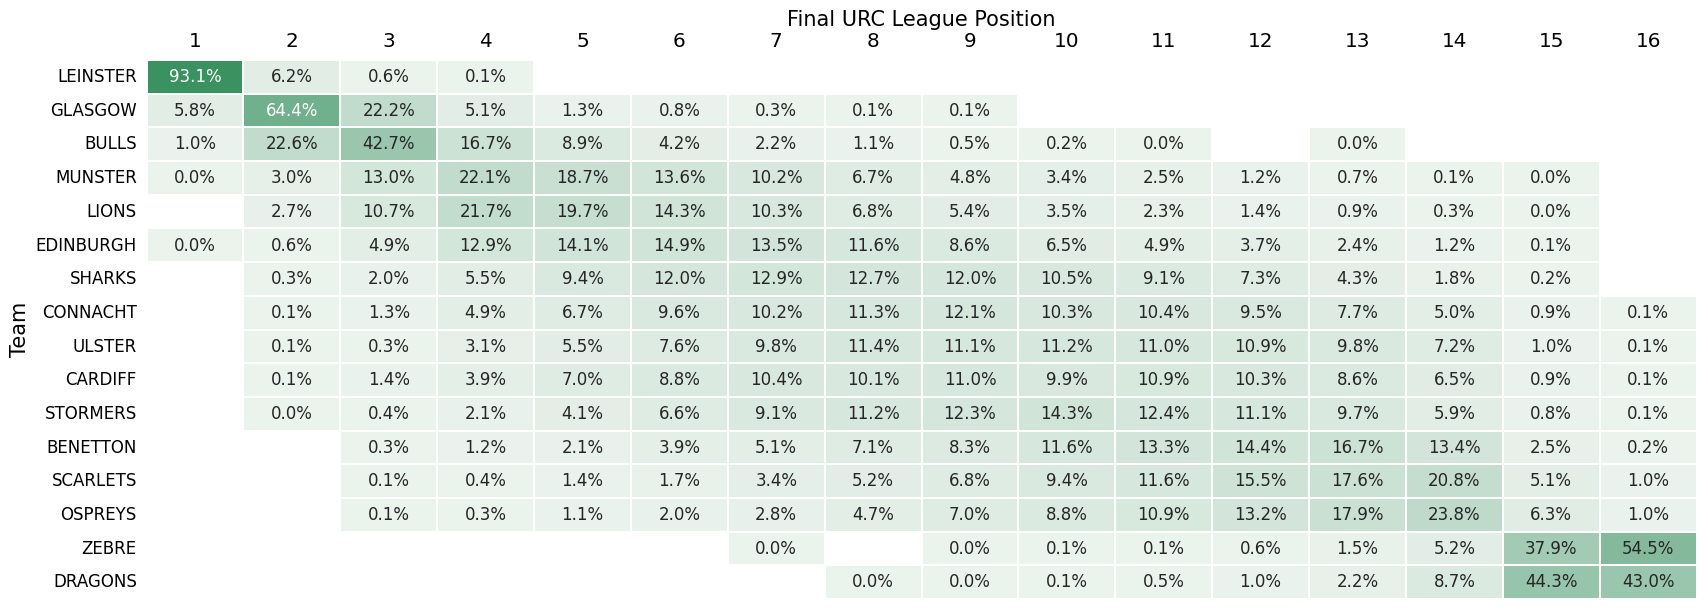

In [130]:
# plot pivoted finishes 
fig, ax = plt.subplots(1,1, figsize=(20, 7))
sns.heatmap(finish_heatmap, 
            annot=True, 
            cbar=False,
            cmap=sns.light_palette("seagreen", as_cmap=True),
           center=.5,
           linewidths=0.07,
           square=False,
           annot_kws={"size": 12},
           fmt=".1%") 


ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

ax.tick_params(left=False, top=False)

plt.yticks(fontsize='large')
plt.xticks(fontsize='x-large')

ax.set_ylabel("Team",fontsize=15)
ax.set_xlabel("Final URC League Position",fontsize=15)

plt.show()

In [100]:
finish_probs

,team,points,pos,iter
0,LEINSTER,56,1,0
1,GLASGOW,55,2,0
2,LIONS,52,3,0
3,BULLS,51,4,0
4,MUNSTER,50,5,0
...,...,...,...,...
11,STORMERS,34,12,999
12,BENETTON,23,13,999
13,SCARLETS,23,14,999
14,DRAGONS,21,15,999


In [106]:
finish_heatmap

pos,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
team,,,,,,,,,,,,,,,,
LEINSTER,0.927,0.065,0.007,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GLASGOW,0.057,0.674,0.199,0.048,0.016,0.004,0.001,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BULLS,0.015,0.203,0.437,0.172,0.091,0.044,0.019,0.011,0.005,0.001,0.002,NaN,NaN,NaN,NaN,NaN
MUNSTER,0.001,0.018,0.135,0.242,0.174,0.132,0.106,0.073,0.045,0.038,0.010,0.013,0.006,0.006,0.001,NaN
LIONS,NaN,0.025,0.112,0.195,0.214,0.167,0.081,0.080,0.043,0.028,0.023,0.019,0.010,0.002,0.001,NaN
EDINBURGH,NaN,0.007,0.043,0.128,0.155,0.137,0.136,0.099,0.082,0.074,0.054,0.043,0.028,0.013,NaN,0.001
SHARKS,NaN,0.005,0.018,0.060,0.090,0.098,0.138,0.138,0.099,0.104,0.096,0.070,0.046,0.033,0.005,NaN
CONNACHT,NaN,0.002,0.011,0.044,0.066,0.104,0.107,0.088,0.106,0.102,0.096,0.109,0.092,0.057,0.014,0.002
ULSTER,NaN,0.001,0.004,0.030,0.053,0.089,0.087,0.105,0.126,0.097,0.122,0.106,0.098,0.071,0.011,NaN


In [107]:
avg_points = finish_probs.groupby('team')['points'].mean().reset_index()
avg_points.index = avg_points['team']
avg_points.drop(columns=['team'], inplace=True)

avg_points

,points
team,
BENETTON,32.124
BULLS,51.124
CARDIFF,35.578
CONNACHT,35.822
DRAGONS,16.930
EDINBURGH,40.326
GLASGOW,57.122
LEINSTER,67.872
LIONS,43.460


In [122]:
avg_points = finish_probs.groupby('team')['points'].mean().reset_index()
team_order = avg_points.sort_values(by='points', ascending=False).team.values.tolist()

array(['LEINSTER', 'GLASGOW', 'BULLS', 'MUNSTER', 'LIONS', 'EDINBURGH',
       'SHARKS', 'CONNACHT', 'ULSTER', 'CARDIFF', 'STORMERS', 'BENETTON',
       'SCARLETS', 'OSPREYS', 'ZEBRE', 'DRAGONS'], dtype=object)

In [112]:
pd.concat([avg_points, finish_heatmap], axis=1)

,points,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
team,,,,,,,,,,,,,,,,,
BENETTON,32.124,NaN,NaN,0.002,0.009,0.016,0.030,0.054,0.082,0.091,0.103,0.144,0.139,0.172,0.137,0.018,0.003
BULLS,51.124,0.015,0.203,0.437,0.172,0.091,0.044,0.019,0.011,0.005,0.001,0.002,NaN,NaN,NaN,NaN,NaN
CARDIFF,35.578,NaN,NaN,0.016,0.047,0.066,0.064,0.105,0.112,0.108,0.113,0.106,0.101,0.083,0.064,0.015,NaN
CONNACHT,35.822,NaN,0.002,0.011,0.044,0.066,0.104,0.107,0.088,0.106,0.102,0.096,0.109,0.092,0.057,0.014,0.002
DRAGONS,16.930,NaN,NaN,NaN,NaN,NaN,0.001,NaN,NaN,0.001,0.002,0.003,0.012,0.027,0.097,0.381,0.476
EDINBURGH,40.326,NaN,0.007,0.043,0.128,0.155,0.137,0.136,0.099,0.082,0.074,0.054,0.043,0.028,0.013,NaN,0.001
GLASGOW,57.122,0.057,0.674,0.199,0.048,0.016,0.004,0.001,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LEINSTER,67.872,0.927,0.065,0.007,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIONS,43.460,NaN,0.025,0.112,0.195,0.214,0.167,0.081,0.080,0.043,0.028,0.023,0.019,0.010,0.002,0.001,NaN
